# _**Keywords EDA**_ #

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from collections import Counter
import seaborn as sns

In [56]:
keywords = pd.read_csv("../data/original data/keywords.csv")

In [57]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [58]:
keywords.describe()

,id
count,46419.000000
mean,109769.951873
std,113045.780256
min,2.000000
25%,26810.500000
50%,61198.000000
75%,159908.500000
max,469172.000000


In [59]:
keywords.shape

(46419, 2)

In [60]:
keywords.isnull().sum()

id          0
keywords    0
dtype: int64

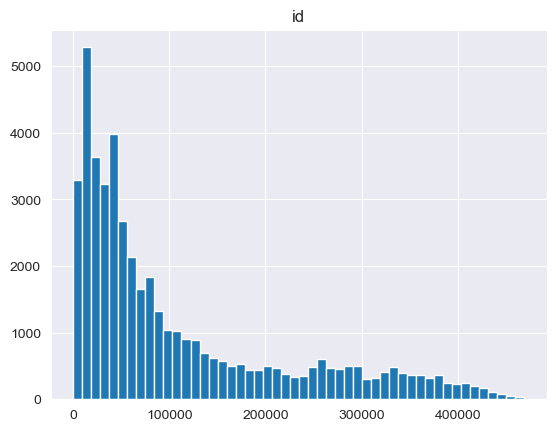

In [61]:
keywords.hist(bins=50)
plt.show()

In [62]:
def extract_text_values(cell, key="name", separator=", "):
    if cell is None or pd.isna(cell):
        return np.nan

    if isinstance(cell, (list, dict)):
        data = cell
    else:
        try:
            data = json.loads(str(cell))
        except (json.JSONDecodeError, TypeError, ValueError):
            return np.nan

    if isinstance(data, dict):
        return data.get(key, np.nan)

    if isinstance(data, list) and len(data) > 0:
        values = [str(item.get(key)) for item in data if isinstance(item, dict) and key in item]
        if not values:
            return np.nan
        return values[0] if len(values) == 1 else separator.join(values)

    return np.nan

In [63]:
keywords['name_keywords'] = keywords['keywords'].apply(lambda x: extract_text_values(x, key="name"))

keywords['id_keywords'] = keywords['keywords'].apply(lambda x: extract_text_values(x, key="id"))

In [64]:
keywords.drop(["keywords"], axis=1, inplace=True)

new csv

In [65]:
keywords.to_csv("../data/final data/keywords.csv", index=False)